In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

The dataset contains retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa. 
#### Features:- 
    sbp - Systolic blood pressure
    tobacco - Cumulative tobacco(kg)
    ldl - Low density liboprotein cholesterol
    adiposity
    famhist - Family history of heart disease(Present, Absent)
    typea - Type-A behaviour
    obesity
    alcohol - Current alcohol consumption
    age - Age at onset
    chd - Response, coronary heart disease

In [2]:
# loading dataset into dataframe

saHeart_df = pd.read_csv('https://hastie.su.domains/ElemStatLearn/datasets/SAheart.data')
saHeart_df

row.names  sbp  tobacco    ldl  adiposity  famhist  typea  obesity  \
0            1  160    12.00   5.73      23.11  Present     49    25.30   
1            2  144     0.01   4.41      28.61   Absent     55    28.87   
2            3  118     0.08   3.48      32.28  Present     52    29.14   
3            4  170     7.50   6.41      38.03  Present     51    31.99   
4            5  134    13.60   3.50      27.78  Present     60    25.99   
..         ...  ...      ...    ...        ...      ...    ...      ...   
457        459  214     0.40   5.98      31.72   Absent     64    28.45   
458        460  182     4.20   4.41      32.10   Absent     52    28.61   
459        461  108     3.00   1.59      15.23   Absent     40    20.09   
460        462  118     5.40  11.61      30.79   Absent     64    27.35   
461        463  132     0.00   4.82      33.41  Present     62    14.70   

     alcohol  age  chd  
0      97.20   52    1  
1       2.06   63    1  
2       3.81   46    0  
3      24.26   58    1  
4      57.34   49    1  
..       ...  ...  ...  
457     0.00   58    0  
458    18.72   52    1  
459    26.64   55    0  
460    23.97   40    0  
461     0.00   46    1  

[462 rows x 11 columns]

#### Q13:- How many records are present in the dataset? Print the metadata of the dataset.

In [4]:
# Solution:- 
    
print(saHeart_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB
None


#### Q14:- Draw a bar plot to show the number of persons having CHD or not in comparison to they having family history of the disease or not.

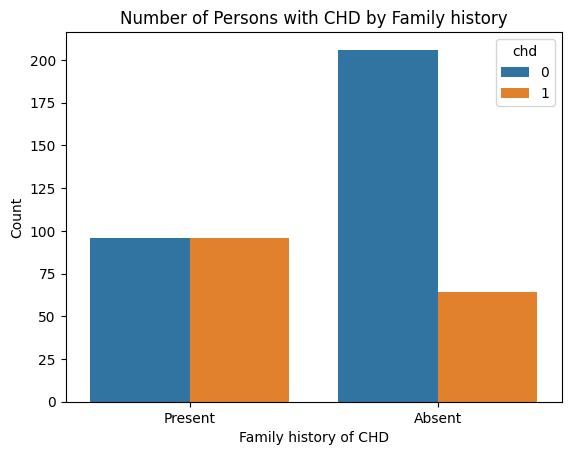

In [7]:
# Solution:- 
sn.countplot(hue = 'chd', x = 'famhist', data = saHeart_df)

plt.xlabel('Family history of CHD')
plt.ylabel('Count')
plt.title('Number of Persons with CHD by Family history')
plt.show()

#### Q15:- Does age have any correlation with sbp? Choose appropriate plot to show the relationship.

In [9]:
# Solution:- 
age_sbp_corr = ['age', 'sbp']
saHeart_df[age_sbp_corr].corr()

age       sbp
age  1.000000  0.388771
sbp  0.388771  1.000000

<Axes: >

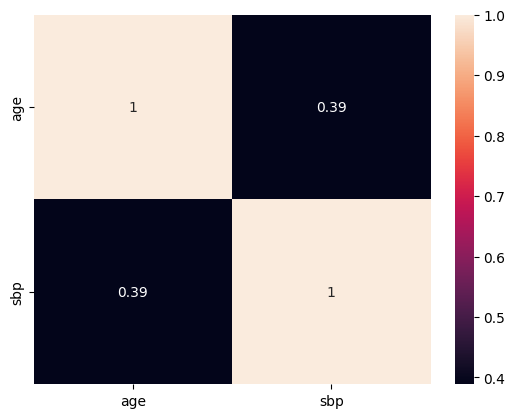

In [10]:
sn.heatmap(saHeart_df[age_sbp_corr].corr(), annot = True)

#### Q16:- Compare the distribution of tobacco consumption for persons having CHD and not having CHD. Can you interpret the effect of tobacco consumption on having coronary heart disease?

C:\Users\NANDAN KUMAR\AppData\Local\Temp\ipykernel_14872\1413322548.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(saHeart_df[saHeart_df['chd'] == 1]['tobacco'],
C:\Users\NANDAN KUMAR\AppData\Local\Temp\ipykernel_14872\1413322548.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(saHeart_df[

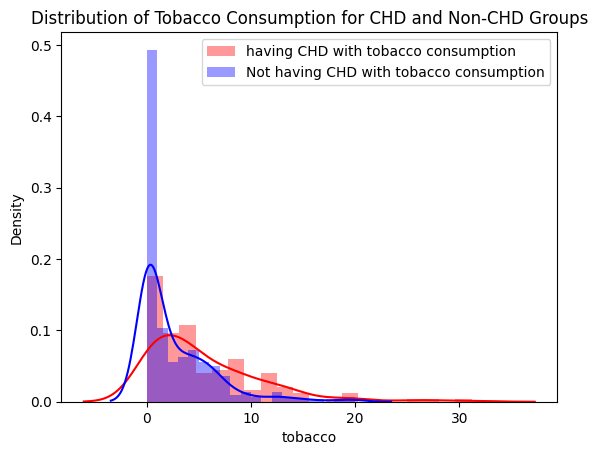

In [16]:
# Solution:- 
sn.distplot(saHeart_df[saHeart_df['chd'] == 1]['tobacco'],
            color = 'r',
            label = 'having CHD with tobacco consumption',
            bins = 20)
sn.distplot(saHeart_df[saHeart_df['chd'] == 0]['tobacco'],
            color = 'b',
            label = 'Not having CHD with tobacco consumption',
            bins = 20)
plt.title('Distribution of Tobacco Consumption for CHD and Non-CHD Groups')
plt.legend()
plt.show()

#### Q17:- How are the parameters sbp, obesity, age and ldl correlated? Choose the right plot to show the relationships.

C:\Users\NANDAN KUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


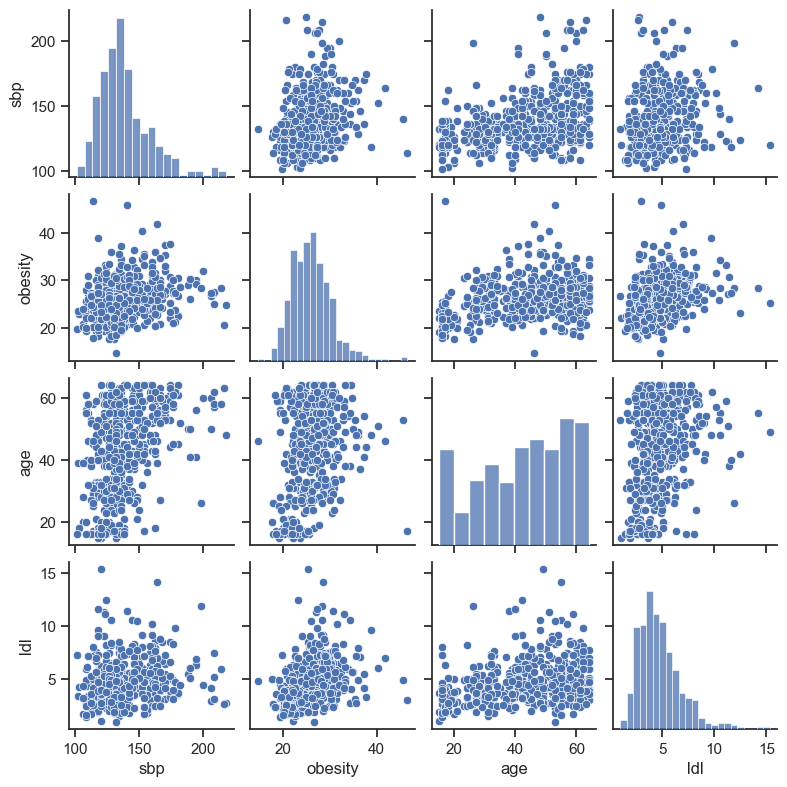

In [28]:
# Solution:- 
new_features = ['sbp', 'obesity', 'age', 'ldl']
# sn.set(style = 'ticks')
sn.pairplot(saHeart_df[new_features], height = 2)

In [22]:
saHeart_df[new_features].corr()

sbp   obesity       age       ldl
sbp      1.000000  0.238067  0.388771  0.158296
obesity  0.238067  1.000000  0.291777  0.330506
age      0.388771  0.291777  1.000000  0.311799
ldl      0.158296  0.330506  0.311799  1.000000

<Axes: >

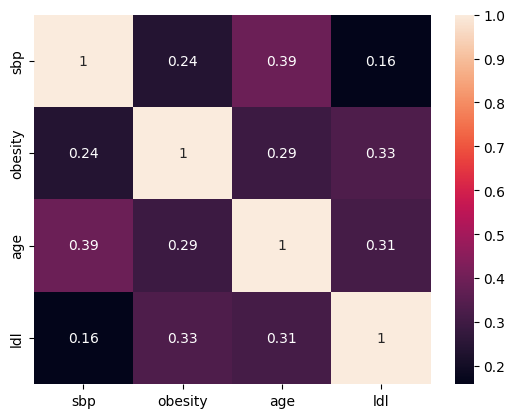

In [23]:
sn.heatmap(saHeart_df[new_features].corr(), annot = True)

#### Q18:- Derive a new column called agegroup from age column where persons falling in different age ranges are categorized as below 

    (0-15) : young
    (15-35) : adults
    (35-55) : mid
    (55-): old

In [37]:
# Solution:- 

def categorized_age(age):
    if 0<=age<=15:
        return 'young'
    elif 15<age<=35:
        return 'adults'
    elif 35<age<=55:
        return 'mid'
    else:
        return 'old'

saHeart_df['ageGroup'] = saHeart_df['age'].apply(categorized_age)
saHeart_df

row.names  sbp  tobacco    ldl  adiposity  famhist  typea  obesity  \
0            1  160    12.00   5.73      23.11  Present     49    25.30   
1            2  144     0.01   4.41      28.61   Absent     55    28.87   
2            3  118     0.08   3.48      32.28  Present     52    29.14   
3            4  170     7.50   6.41      38.03  Present     51    31.99   
4            5  134    13.60   3.50      27.78  Present     60    25.99   
..         ...  ...      ...    ...        ...      ...    ...      ...   
457        459  214     0.40   5.98      31.72   Absent     64    28.45   
458        460  182     4.20   4.41      32.10   Absent     52    28.61   
459        461  108     3.00   1.59      15.23   Absent     40    20.09   
460        462  118     5.40  11.61      30.79   Absent     64    27.35   
461        463  132     0.00   4.82      33.41  Present     62    14.70   

     alcohol  age  chd ageGroup  
0      97.20   52    1      mid  
1       2.06   63    1      old  
2       3.81   46    0      mid  
3      24.26   58    1      old  
4      57.34   49    1      mid  
..       ...  ...  ...      ...  
457     0.00   58    0      old  
458    18.72   52    1      mid  
459    26.64   55    0      mid  
460    23.97   40    0      mid  
461     0.00   46    1      mid  

[462 rows x 12 columns]

#### Q19:- Find out the number of CHD cases in different age categories. Do a barplot and sort them in the order of age groups.

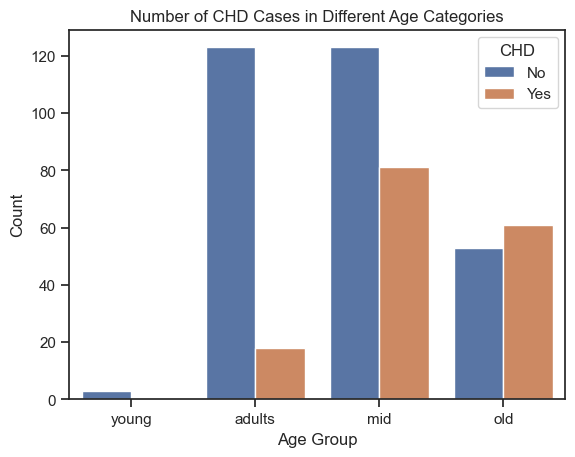

In [39]:
# Solution:- 
sn.countplot(hue = 'chd', x = 'ageGroup', data = saHeart_df, order = ['young', 'adults', 'mid', 'old'])

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Number of CHD Cases in Different Age Categories')

plt.legend(title='CHD', labels = ['No', 'Yes'])
plt.show()

#### Q20:- Draw a box plot to compare distribution of ldl for different age groups.

<Axes: xlabel='ageGroup', ylabel='ldl'>

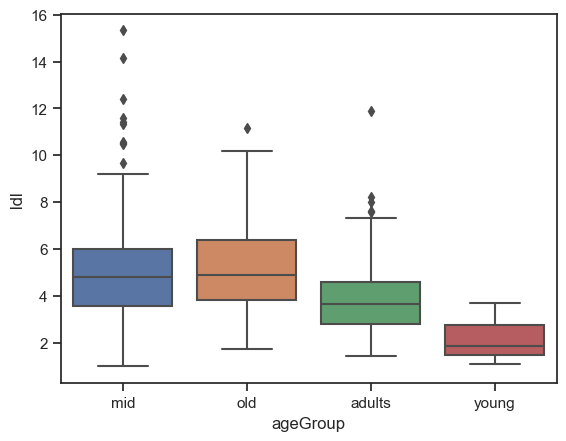

In [40]:
sn.boxplot(x = 'ageGroup', y = 'ldl', data = saHeart_df)